## Exercise: Customer Segmentation Based on Consumption Habits  
Problem Description  
You work for a market analysis company that wants to segment its customers into groups based on their consumption habits. You are provided with a fictitious dataset containing customer characteristics related to their monthly spending and purchase frequency. The goal is to identify patterns in the data and divide the customers into groups using unsupervised clustering algorithms.

### Dataset  
#### The dataset includes information about 300 customers, with the following features:

- Monthly Income (1,000 and $10,000).  
- Purchase Frequency: Number of purchases made per month (between 1 and 30).
- Average Spending (20 and $500).  
- Tenure (years): How long the customer has been in the company’s database (between 1 and 15 years). The data will be provided in CSV  

format with the columns: MonthlyIncome, PurchaseFrequency, AverageSpending, Tenure.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

customer_data = pd.read_csv('customer_data.csv')
pd.set_option('display.max_rows', None)
#customer_data


In [ ]:
#info básica csv
customer_data.info(), customer_data.shape,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MonthlyIncome      300 non-null    float64
 1   PurchaseFrequency  300 non-null    int64  
 2   AverageSpending    300 non-null    float64
 3   Tenure             300 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 9.5 KB


(None, (300, 4))

In [ ]:
#maximos
limits = customer_data.min(), customer_data.max()
limits

(MonthlyIncome        1045.554255
 PurchaseFrequency       1.000000
 AverageSpending        21.245612
 Tenure                  1.000000
 dtype: float64,
 MonthlyIncome        9910.484651
 PurchaseFrequency      30.000000
 AverageSpending       498.682657
 Tenure                 15.000000
 dtype: float64)

In [ ]:
#minimos
null_values = customer_data.isnull().sum()
null_values

MonthlyIncome        0
PurchaseFrequency    0
AverageSpending      0
Tenure               0
dtype: int64

los datos se ven bien, sin valores nulos

In [ ]:
#parámetros estadísticos
customer_data.describe()

,MonthlyIncome,PurchaseFrequency,AverageSpending,Tenure
count,300.000000,300.000000,300.000000,300.000000
mean,5456.841392,16.246667,261.815191,7.813333
std,2649.064855,8.826789,135.345720,4.388929
min,1045.554255,1.000000,21.245612,1.000000
25%,3151.727236,9.000000,148.634645,4.000000
50%,5605.459557,17.000000,273.970435,8.000000
75%,7811.736545,24.000000,374.441184,12.000000
max,9910.484651,30.000000,498.682657,15.000000


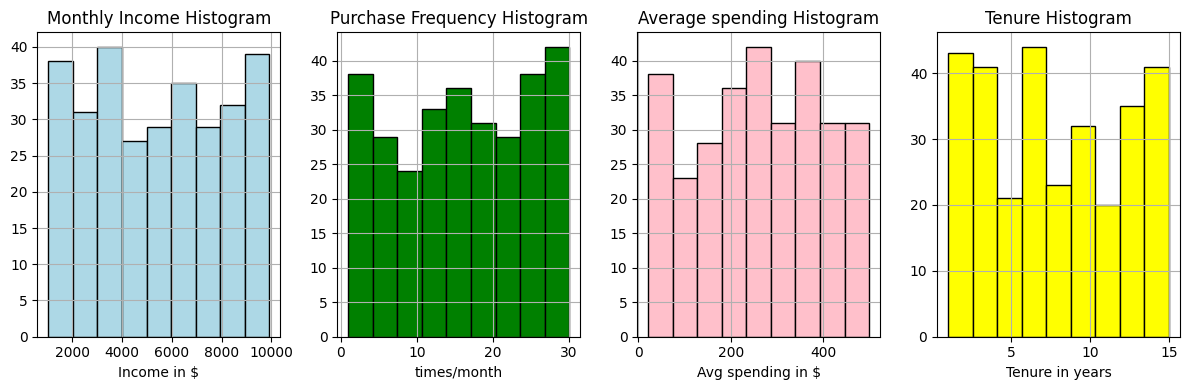

In [ ]:

# Crear una figura y ejes para los subplots
sturges = 9
fig, axes = plt.subplots(1, 4, figsize=(12, 4))  # 1 fila, 4 columnas

# Primera gráfica: Histograma de MonthlyIncome
customer_data['MonthlyIncome'].hist(
    bins=sturges, 
    color='lightblue', 
    edgecolor='black', 
    ax=axes[0]  # Especificar el primer subplot
)
axes[0].set_title('Monthly Income Histogram')
axes[0].set_xlabel('Income in $')

# Segunda gráfica: Histograma de PurchaseFrequency
customer_data['PurchaseFrequency'].hist(
    bins=sturges, 
    color='green', 
    edgecolor='black', 
    ax=axes[1]  # Especificar el segundo subplot
)
axes[1].set_title('Purchase Frequency Histogram')
axes[1].set_xlabel('times/month')

#avg spending
customer_data['AverageSpending'].hist(
    bins=sturges, 
    color='pink', 
    edgecolor='black', 
    ax=axes[2]  
)
axes[2].set_title('Average spending Histogram')

axes[2].set_xlabel('Avg spending in $')

#tenure
customer_data['Tenure'].hist(
    bins=sturges, 
    color='yellow', 
    edgecolor='black', 
    ax=axes[3]  
)
axes[3].set_title('Tenure Histogram')
axes[3].set_xlabel('Tenure in years')

# Ajustar espacio entre subplots
plt.tight_layout()

# Mostrar las gráficas
plt.show()



No parece haber un sesgo definido, solo en avg spending en 250 
## correlación

In [50]:
matriz_corr = customer_data[['MonthlyIncome', 'PurchaseFrequency', 'AverageSpending', 'Tenure']].corr()
matriz_corr

,MonthlyIncome,PurchaseFrequency,AverageSpending,Tenure
MonthlyIncome,1.000000,-0.081975,0.044116,0.046291
PurchaseFrequency,-0.081975,1.000000,0.041330,-0.003124
AverageSpending,0.044116,0.041330,1.000000,0.032393
Tenure,0.046291,-0.003124,0.032393,1.000000


Text(0.5, 1.0, 'Matriz correlación')

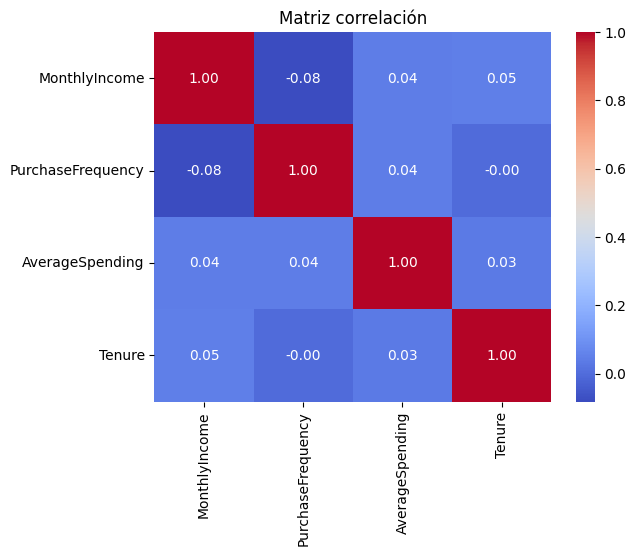

In [51]:
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz correlación")


no parece existir correlación entre las variables

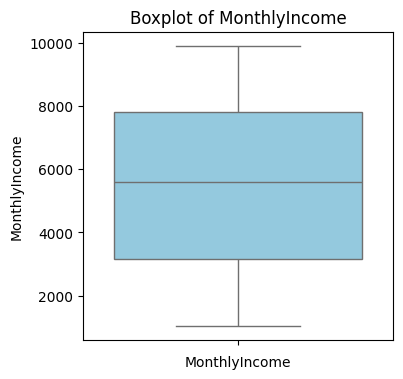

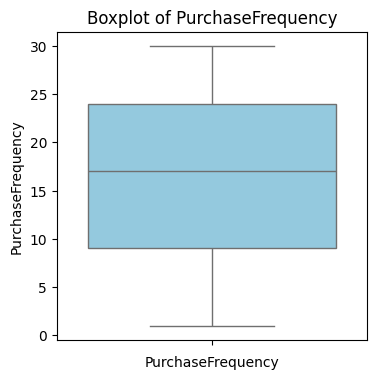

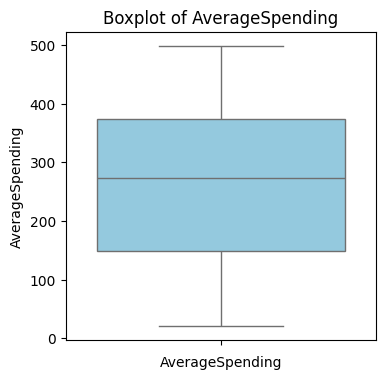

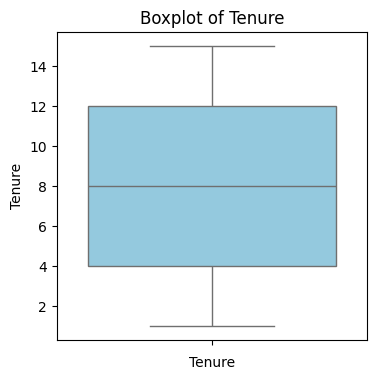

In [66]:

features = ['MonthlyIncome', 'PurchaseFrequency', 'AverageSpending', 'Tenure']
# Crear un boxplot para cada característica
for feature in features:
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=customer_data[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

parece que no hay datos atípicos, podemos usarlos para el modelo


### Data Preparation
Scale the numerical features to ensure better performance of the clustering algorithms.  
Determine the optimal number of clusters (k) using methods such as the elbow method or silhouette score.

### para saber el numero de conjuntos en que dividir a los clientes usaremos elbow method

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#escalar datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

In [ ]:
# Compute WCSS for different values of k
#Within Cluster Sum of Squares
wcss = []
k_range = range(1, 11)  # Test k from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=9)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

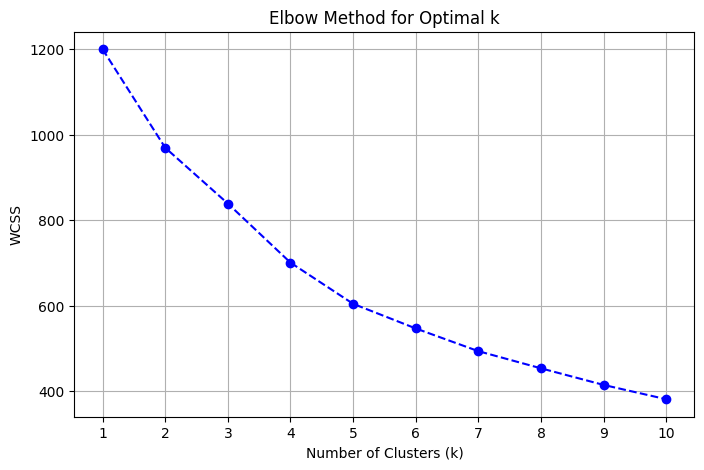

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.show()

la reducción más significativa está en el 2 cluster

In [ ]:
optimal_k = 2  # segun wcss
kmeans = KMeans(n_clusters=optimal_k, random_state=9)#9 es mi randomseed osi osi 
clusters = kmeans.fit_predict(scaled_data)

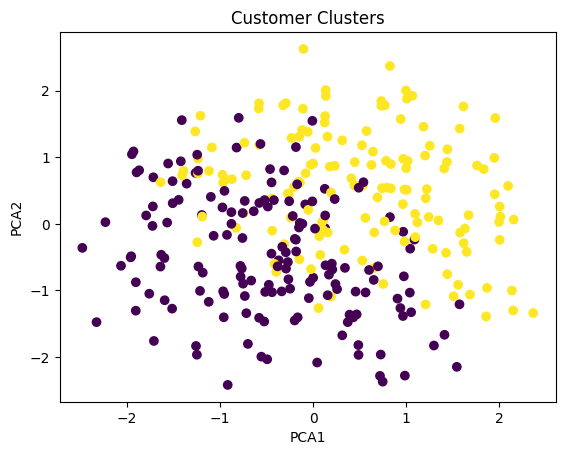

In [101]:
pca = PCA(n_components=2) #la famosa reducción de dimensionalidad
reduced_data = pca.fit_transform(scaled_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

Si los clusters están bien separados, el algoritmo hizo un buen trabajo segmentando los datos. Si los clusters se solapan, puede ser necesario ajustar 𝑘 k (número de clusters) o usar otra métrica de clustering.

se ven solapadísimos


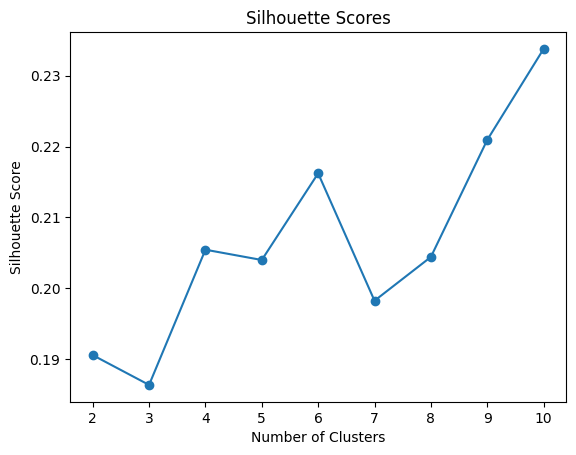

In [116]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Probamos varios valores de k (de 2 a 10 en este caso)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

# Graficamos las puntuaciones de Silhouette
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()



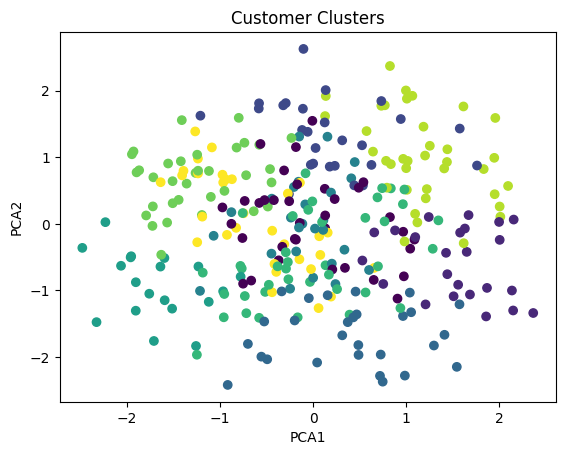

In [117]:
optimal_k = 10  # segun silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=9)#9 es mi randomseed osi osi 
clusters = kmeans.fit_predict(scaled_data)
pca = PCA(n_components=2) #la famosa reducción de dimensionalidad
reduced_data = pca.fit_transform(scaled_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

según puntuaciones de Silhouette el # óptimo de clusteres es 10, pero según k means es 2